In [19]:
import numpy as np
import pandas as pd
import pdb
import matplotlib.pyplot as plt


In [74]:

df = pd.read_table("horror_all2.txt", delimiter = '\t',parse_dates=True,infer_datetime_format=True,date_parser=pd.to_datetime)
ptest = df[['Released','Released Worldwide', 'Year', 'Theatrical Distributor','Source','Creative Type', \
            'Production Budget', 'Opening Weekend Theaters', 'Opening Weekend Revenue', 'Worldwide Box Office']]
titles = df['Title']


Index([u'Released', u'Released Worldwide', u'Year', u'Theatrical Distributor',
       u'Source', u'Creative Type', u'Production Budget',
       u'Opening Weekend Theaters', u'Opening Weekend Revenue',
       u'Worldwide Box Office'],
      dtype='object')
0     46227375
1     74843754
2    222086658
3     81831866
4     37493221
Name: Worldwide Box Office, dtype: int64
0    Feb 24 2017
1     Feb 3 2017
2    Jan 20 2017
3    Oct 21 2016
4    Sep 16 2016
Name: Released, dtype: object
0     2017-02-24
1     2017-02-03
2     2017-01-20
3     2016-10-21
4     2016-09-16
5     2016-09-02
6     2016-08-26
7     2016-07-22
8     2016-07-01
9     2016-06-24
10    2016-06-10
11    2016-05-13
12    2016-04-15
13    2016-02-19
14    2016-01-22
15    2015-12-31
16    2015-12-31
17    2015-12-22
18    2015-12-01
19    2015-11-20
20    2015-11-10
21    2015-10-27
22    2015-10-23
23    2015-10-16
24    2015-10-16
25    2015-09-29
26    2015-09-29
27    2015-09-25
28    2015-09-01
29    2015-09-01
   

C:\Users\Jason\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jason\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


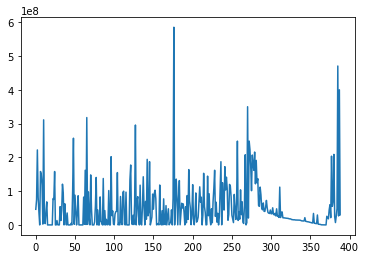

In [76]:
print ptest.columns
print ptest['Worldwide Box Office'][:5]
print ptest['Released'][:5]
ptest['Released'] = pd.to_datetime(ptest['Released'], infer_datetime_format=True)
ptest['Released Worldwide'] = pd.to_datetime(ptest['Released Worldwide'], infer_datetime_format=True)
print ptest['Released']
plt.plot(ptest['Worldwide Box Office'])
plt.show()

In [78]:
print ptest[:5]
print titles[:5]

dummies = pd.get_dummies(ptest)
print dummies[:5]

    Released Released Worldwide  Year Theatrical Distributor  \
0 2017-02-24         2017-02-24  2017              Universal   
1 2017-02-03         2017-02-03  2017     Paramount Pictures   
2 2017-01-20         2017-01-18  2017              Universal   
3 2016-10-21         2016-10-20  2016              Universal   
4 2016-09-16         2016-09-15  2016              Lionsgate   

                Source         Creative Type  Production Budget  \
0  Original Screenplay  Contemporary Fiction            5000000   
1  Original Screenplay  Contemporary Fiction           25000000   
2  Original Screenplay  Contemporary Fiction            5000000   
3        Based on Game               Fantasy            9000000   
4  Original Screenplay  Contemporary Fiction           10000000   

   Opening Weekend Theaters  Opening Weekend Revenue  Worldwide Box Office  
0                      2781                 33377060              46227375  
1                      2931                 13002632      

In [65]:

#CODE IN A COLUMN FOR DIFFERENCE IN RELEASE DATES
#MONTH OF YEAR
#DISTRIBUTOR TOTALS
#ROI
#JUMP SCARES
#PG13/R RATINGS
#RUN TIMES

dist_counts = ptest.groupby('Theatrical Distributor')

def get_dict(col):
    #pdb.set_trace()
    xdict = {}
    val=0
    for x in col:
        if not x in xdict:
            #print('Nope')
            xdict[x] = val
            val+=1
    return xdict
def replace_from_dict(x,xdict):
    if x in xdict:
        x = xdict[x]
    return x

# #print ptest['Source'][:5]
# xdict = get_dict(ptest['Source'])
# print ptest['Source'][:5]
# print xdict
# print replace_from_dict('Original Screenplay',xdict)
# ptest['Source']=ptest.apply((lambda x: replace_from_dict(x['Source'],xdict)), axis=1)
# print ptest['Source'][:10]


# for col in ptest:
#     cdict = get_dict(col) 
#     col = ptest.apply((lambda x: replace_from_dict(x['Source'],xdict)), axis=1)

0    Original Screenplay
1    Original Screenplay
2    Original Screenplay
3          Based on Game
4    Original Screenplay
Name: Source, dtype: object
{nan: 10, 'Based on Comic/Graphic Novel': 11, 'Based on Fiction Book/Short Story': 4, 'Based on TV': 12, 'Original Screenplay': 0, 'Based on Short Film': 2, 'Compilation': 3, 'Based on Folk Tale/Legend/Fairytale': 6, 'Based on Real Life Events': 9, 'Remake': 5, 'Based on Factual Book/Article': 8, 'Spin-Off': 7, 'Based on Game': 1}
0
0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    2
8    0
9    0
Name: Source, dtype: int64


C:\Users\Jason\Anaconda2\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
ptest = ptest.replace( '[\$,)]','', regex=True )
ptest['ROI']=ptest['Domestic Box Office'].astype(float)/ptest['Production Budget'].astype(float)
ptest[['Title','Source','Theatrical Distributor','Production Budget','Domestic Box Office','ROI']]